# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Работа пройдет в 2 этапа:

1. Приоритизируйте гипотезы (методы: ICE/RICE); 
2. Запустите A/B-тест и проанализируйте результаты.

Для выполения поставленных задач даны 3 датафрейма:

- c описаниеv гипотез;

- с данными о заказах (разделенные на группы A/B-теста);

- с данными о клиентах (разделенные на группы A/B-теста).

# Оглавление

1. [Часть 1. Приоритизация гипотез](#start)
2. [Часть 2. Анализ A/B-теста](#parth2)\
    2.1 [Построим графики комулятивной выручке](#parth2.1)    
    2.2 [Построим график кумулятивного среднего чека по группам](#parth2.2)\
    2.3 [Построим график относительного изменения кумулятивного среднего чека группы B к группе A](#parth2.3)\
    2.4 [Построим график кумулятивной конверсии по группам](#parth2.4)\
    2.5 [Построим график относительного изменения кумулятивной конверсии группы B к группе A](#parth2.5)\
    2.6 [Постройте точечный график количества заказов по пользователям](#parth2.6)\
    2.7 [Постройте точечный график стоимостей заказов](#parth2.7)\
    2.8 [Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным](#parth2.8)\
    2.9 [Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным](#parth2.9)\
    2.10 [Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным](#parth2.10)\
    2.11 [Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным](#parth2.11)
3. [Общий вывод и решение по результату теста](#end)

## Часть 1. Приоритизация гипотез. <a id="start"></a>

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_columns', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
# метод ICE
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['ICE'] = hypothesis['ICE'].astype('int')
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16
0,"Добавить два новых канала привлечения трафика,...",13
7,Добавить форму подписки на все основные страни...,11
6,Показать на главной странице баннеры с актуаль...,8
2,Добавить блоки рекомендаций товаров на сайт ин...,7
1,"Запустить собственную службу доставки, что сок...",2
3,"Изменить структура категорий, что увеличит кон...",1
4,"Изменить цвет фона главной страницы, чтобы уве...",1
5,"Добавить страницу отзывов клиентов о магазине,...",1


Применив данный метод наблюдаем перспективность гипотез в порядке убывания (от более перспективных, к менее).

In [5]:
# метод RICE
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['RICE'] = hypothesis['RICE'].astype('int')
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112
2,Добавить блоки рекомендаций товаров на сайт ин...,56
0,"Добавить два новых канала привлечения трафика,...",40
6,Показать на главной странице баннеры с актуаль...,40
8,"Запустить акцию, дающую скидку на товар в день...",16
3,"Изменить структура категорий, что увеличит кон...",9
1,"Запустить собственную службу доставки, что сок...",4
5,"Добавить страницу отзывов клиентов о магазине,...",4
4,"Изменить цвет фона главной страницы, чтобы уве...",3


Применив данный метод наблюдаем перспективность гипотез в порядке убывания (от более перспективных, к менее).

In [6]:
hypothesis.style.bar(subset=['ICE', 'RICE'], color=['#5fba7d'])

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1,9
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1,4
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16,16


#### Вывод:

При применении разных методов приоритезации гипотез мы получили и разные результаты. Это произошло из-за того, что в отличии от метода ICE, метод RICE учитывает компонент Reach (скольких пользователей затронет изменение, которое вы хотите внести). Учет данного компонента хорошо отображает гипотеза: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", которая в методе ICE занимала 3 место в приоритете, но с применением метода RICH занимает уверенное первое место потому, что имеет наивысший бал в компоненте Reach, в совокупными высокими балами в других компонентах. А лидер метода ICE гипотеза "Запустить акцию, дающую скидку на товар в день рождения" имеет очень низкий балл в компоненте Reach, поэтому при использовании метода RICE опустился на 5 место в списке. 

## Часть 2. Анализ A/B-теста<a id="parth2"></a>

In [7]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.sample(5)

,transactionId,visitorId,date,revenue,group
291,2315635631,2606208134,2019-08-03,4299,A
893,3390166538,329726006,2019-08-21,4188,A
370,857639553,2044997962,2019-08-24,2540,A
702,1936881098,3607649875,2019-08-07,2555,A
366,2037051350,1957949546,2019-08-19,16770,A


In [8]:
orders.info()
# изменим тип данных даты
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
print('Сумарное количество пропущенных значений по столбцам:')
orders.isna().sum()

Сумарное количество пропущенных значений по столбцам:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
print('Количество дублирующихся строк:', orders.duplicated().sum())

Количество дублирующихся строк: 0


In [11]:
print(orders['date'].min(), '-', orders['date'].max())

2019-08-01 00:00:00 - 2019-08-31 00:00:00


In [12]:
orders_uniq = orders.pivot_table(index='visitorId', columns='group', values = 'revenue', aggfunc='count').reset_index()
orders_uniq = orders_uniq.query('A > 0 and B > 0')
print('Количество пользователей которые попали в обе группы:', orders_uniq.shape)
print('Количество уникальных пользователей:', len(orders['transactionId'].unique()))
print('Соотношение пересекаемых пользователей в данных {:.2%}'.format(58 / 1197))
print('Количество покупок у пользователей которые попали в обе группы:', int(orders_uniq['A'].sum() + orders_uniq['B'].sum()))
print('Соотношение пересекаемых покупок всех пользователей к тем что попали в две группы {:.2%}'
      .format(181 / orders['transactionId'].count()))


Количество пользователей которые попали в обе группы: (58, 3)
Количество уникальных пользователей: 1197
Соотношение пересекаемых пользователей в данных 4.85%
Количество покупок у пользователей которые попали в обе группы: 181
Соотношение пересекаемых покупок всех пользователей к тем что попали в две группы 15.12%


В датафрейме orders содержатся данные о покупках за период с 2019-08-01 00:00:00 по 2019-08-31 00:00:00. Пропущенных значений и дубликатов в данных нет. Тип данных в столбце с датой был изменен на datetime. Так же по результатам теста 58 пользователей (4.85% от всех пользователей) попали в обе группы, это 181 покупка (15% от всех покупок). Такое могло произойти в следствии:

- один пользователь заходил на наш сайт с разных устройств (из-за этого наш сайт получал разные сookie и аутентифицировал пользователя в разные группы);

- возможно техническая ошибка.

Будем считать что такие пересечения в данных приемлемы для проведения дальнейшего теста.

In [13]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors.sample(5)

,date,group,visitors
51,2019-08-21,B,656
60,2019-08-30,B,490
2,2019-08-03,A,507
47,2019-08-17,B,421
1,2019-08-02,A,619


In [14]:
visitors.info()
# изменим тип данных даты
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
print('Сумарное количество пропущенных значений по столбцам:')
visitors.isna().sum()

Сумарное количество пропущенных значений по столбцам:


date        0
group       0
visitors    0
dtype: int64

In [16]:
print('Количество дублирующихся строк:', visitors.duplicated().sum())

Количество дублирующихся строк: 0


In [17]:
print(visitors['date'].min(), '-', visitors['date'].max())

2019-08-01 00:00:00 - 2019-08-31 00:00:00


В датафрейме visitors содержатся данные о визитах нашего сайта за период с 2019-08-01 00:00:00 по 2019-08-31 00:00:00. Пропущенных значений и дубликатов в данных нет. Тип данных в столбце с датой был изменен на datetime.

#### 2.1 Построим графики комулятивной выручке <a id="parth2.1"></a>

Чтобы построить графики, нужно собрать кумулятивные данные в одном датафрейме:

In [18]:
# найдем уникальную дату для каждой группы
datesGroups = orders[['date','group']].drop_duplicates()
# найдем число уникальных заказов и покупателей в каждоу группе на каждое число
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                    .agg({
                                        'date' : 'max', 
                                        'group' : 'max', 
                                        'transactionId' : pd.Series.nunique, 
                                        'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
                                    .sort_values(by=['date','group'])
# количество уникальных посетителей в группе теста по указанную дату включительно
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({
                                           'date': 'max', 
                                           'group': 'max', 
                                           'visitors': 'sum'}), axis=1).sort_values(by=['date','group'])
# объеденим комулятивные данные по дате и группе 
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])\
                                 .rename(columns={'visitorId': 'buyers'})
cumulativeData

,date,group,transactionId,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Создадим переменную для каждой группы и построим графики по коммулятивной выручке:

In [19]:
# группа А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'transactionId']]
# группа B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'transactionId']]

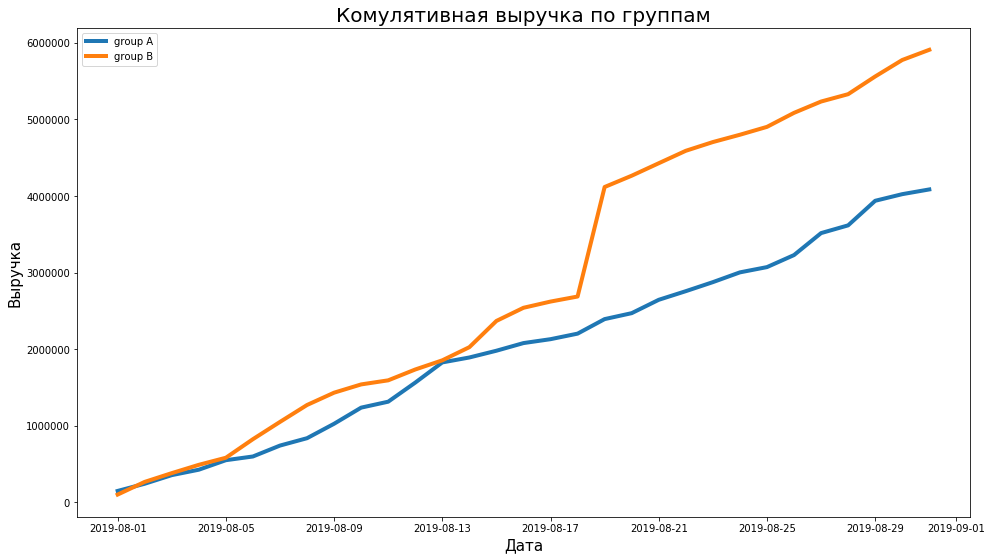

In [20]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.subplots(figsize=(16,9))
plt.title('Комулятивная выручка по группам', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Выручка', fontsize=15)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='group A', linewidth=4.0)
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='group B', linewidth=4.0)
plt.legend()
plt.show()

Динамика выручек в обеих группах положительная (можно фиксировать только ежедневный рост). Первый 5 дней группы идут приблизительно с одинаковой выручкой, далее выручка группы В начинает немного возрастать над выручкой группы А. К 2009-08-13 выручки снова выравниваются, но после, и вплоть до окнца месяца выручка группы B начинает заметно увеличиваться. Причем в один из дней рост аномально большой, скорее всего на это повлияли выбросы.  

#### 2.2 Построим график кумулятивного среднего чека по группам<a id="parth2.2"></a>

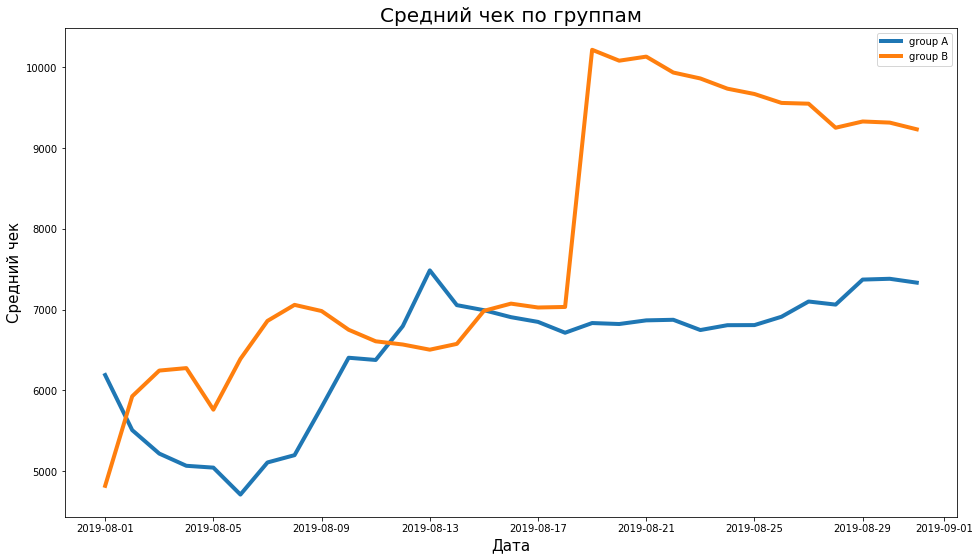

In [21]:
plt.subplots(figsize=(16,9))
plt.title('Средний чек по группам', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Средний чек', fontsize=15)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['transactionId'], label='group A', linewidth=4.0)
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['transactionId'], label='group B', linewidth=4.0)
plt.legend()
plt.show()

В группе А в первой половине месяца следует падение среднего чека, а после постепенный рост, во второй половине месяца средний чек этой группы начинает выравниваться, с небольшим ростом. В группе В средний чек в первой половине месяца имеет характерный волнообразный характер. Во второй половине месяца в группе В наблюдается сильный скачок с 7000 до 10000, скорее всего на это повлияла крупная покупка (выброс), после которой средний чек постепенно падает. В этой группе нужно больше данных для установления реального показателя среднего чека.

#### 2.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A<a id="parth2.3"></a>

In [22]:
# объеденим группы
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,transactionIdA,revenueB,transactionIdB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


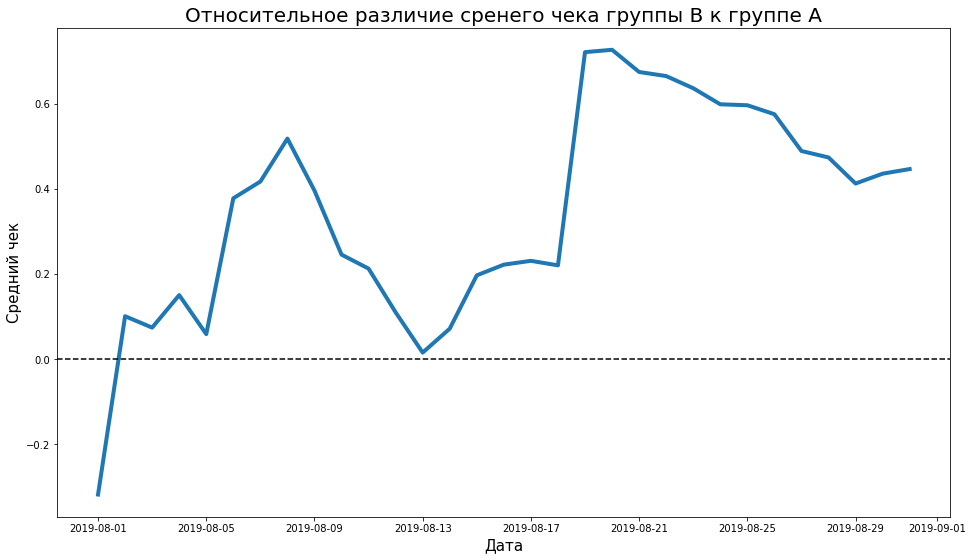

In [23]:
# cтроим отношение средних чеков
plt.subplots(figsize=(16,9))
plt.title('Относительное различие сренего чека группы B к группе A', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Средний чек', fontsize=15)
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionIdA'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionIdA'])-1, 
         linewidth=4.0)
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Средний чек группы В по сравнению с группой А на протяжении практически всего теста больше. Но видны резкие скачки и падения в определеные даты. Именно тогда и были совершены аномальные покупки.

#### 2.4 Построим график кумулятивной конверсии по группам<a id="parth2.4"></a>

In [24]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['transactionId'] / cumulativeData['visitors']
# отфильтруем данные по группам
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

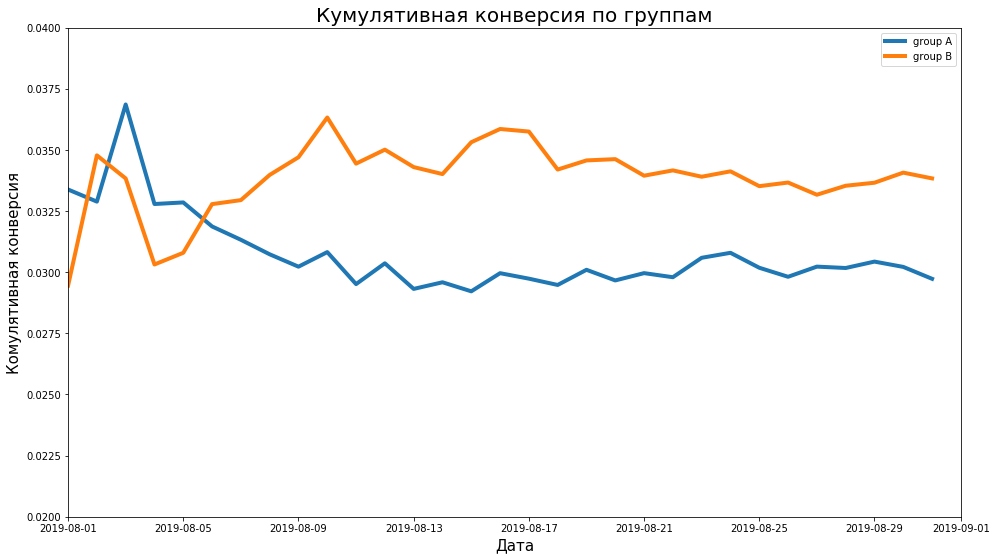

In [25]:
# строим график
plt.subplots(figsize=(16,9))
plt.title('Кумулятивная конверсия по группам', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Комулятивная конверсия', fontsize=15)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='group A', linewidth=4.0)
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='group B', linewidth=4.0)
plt.axis(['2019-08-01', '2019-09-01', 0.02, 0.04])
plt.legend()
plt.show()

В первые 5 дней теста конверсия сильно "скакала" в каждой группе. Во второй половине месяца конверсии начали постепенно выравниваться. В группе В конверсия на протяжении практически всего теста (кроме первых 6 дней) выше, по сравнению с группой А.

#### 2.5 Построим график относительного изменения кумулятивной конверсии группы B к группе A<a id="parth2.5"></a>

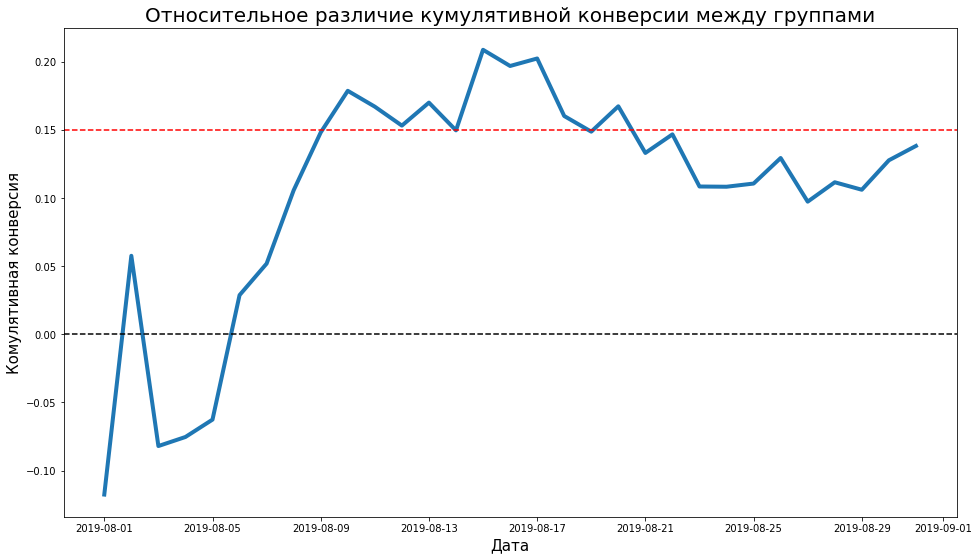

In [26]:
# объеденим группы с конверсиями
mergedCumulativeConversions = cumulativeDataA.merge(cumulativeDataB, on='date', suffixes=['A', 'B'])
plt.subplots(figsize=(16,9))
plt.title('Относительное различие кумулятивной конверсии между группами', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Комулятивная конверсия', fontsize=15)
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] -1,
        linewidth=4.0)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='red', linestyle='--') 
plt.show()

Практически с начала теста конверсия группы B на 15% больше. Но конверсия еще не зафиксировалась, на графике видны скачки между 10% - 20%. Констатировать можно только то, что конверсия группы В больше, но для того что бы ответить на сколько, необходимо больше наблюдений.

#### 2.6 Постройте точечный график количества заказов по пользователям<a id="parth2.6"></a>

In [27]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [28]:
# найдем уникальное число покупок у каждого пользователя
transactionByUsers = orders\
    .drop(['group', 'revenue', 'date'], axis=1)\
    .groupby('visitorId', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique})

transactionByUsers.sort_values(by='transactionId', ascending=False)

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


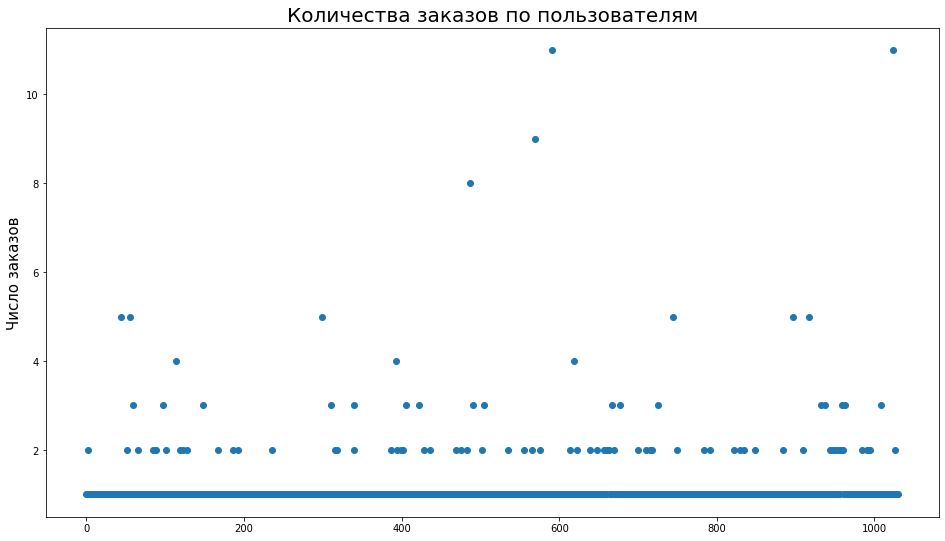

In [29]:
x_values = pd.Series(range(0,len(transactionByUsers)))
plt.subplots(figsize=(16,9))
plt.ylabel('Число заказов', fontsize=15)
plt.title('Количества заказов по пользователям', fontsize=20)
plt.scatter(x_values, transactionByUsers['transactionId'])
plt.show()

Пользователей, сделавших более двух заказов крайне мало. Для магазина хорошо, что пользователи возвращаются к нам и заказывают повторно, но для нашего теста такие пользователи могут быть аномальны. Необходимо посмотреть сколько пользователей в процентном соотношении в нашей выборке делают 2 и более заказа.

In [30]:
print('Для 90% пользователей характерное число заказов:', np.percentile(transactionByUsers['transactionId'], 90))
print('Для 95% пользователей характерное число заказов:', np.percentile(transactionByUsers['transactionId'], 95))
print('Для 99% пользователей характерное число заказов:', np.percentile(transactionByUsers['transactionId'], 99))

Для 90% пользователей характерное число заказов: 1.0
Для 95% пользователей характерное число заказов: 2.0
Для 99% пользователей характерное число заказов: 4.0


Не более 5% пользователей совершили более 2 заказов, и не более 1% пользователей совершили более 4 заказов. Будем считать, что аномальное количество заказов - это более 2 заказов.

#### 2.7 Постройте точечный график стоимостей заказов<a id="parth2.7"></a>

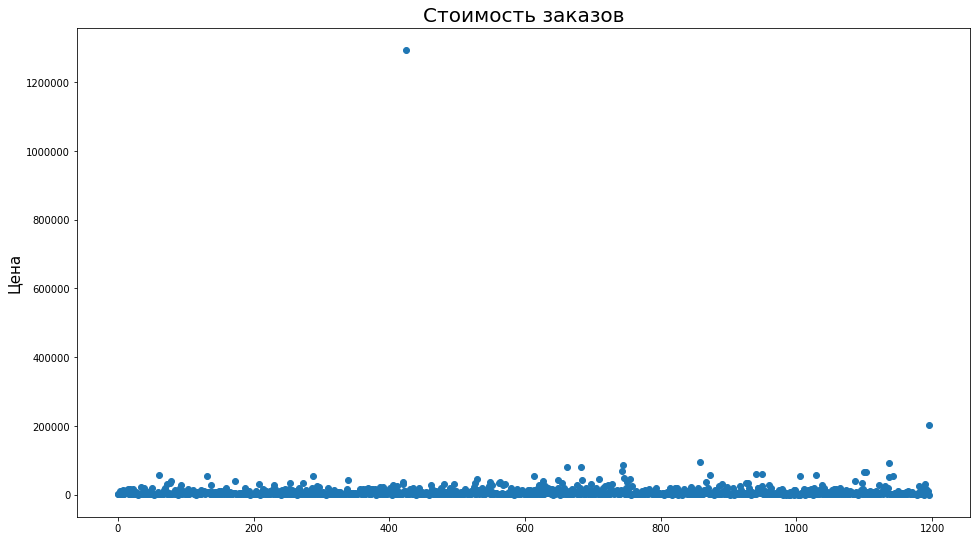

In [31]:
x_values_revenue = pd.Series(range(0,len(orders['revenue'])))
plt.subplots(figsize=(16,9))
plt.ylabel('Цена', fontsize=15)
plt.title('Стоимость заказов', fontsize=20)
plt.scatter(x_values_revenue, orders['revenue'])
plt.show()

Видим, что стоимость большинства заказов не превышает и 15000, хотя и есть отдельные явные выбросы, посмотрим на стоимость заказов более детально с верхней границей стоимости до 50000.

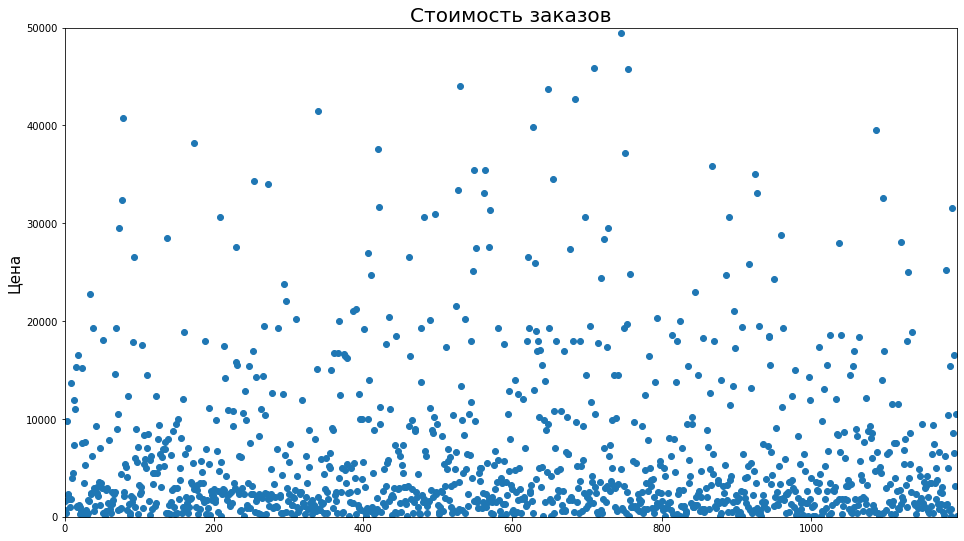

In [32]:
plt.subplots(figsize=(16,9))
plt.ylabel('Цена', fontsize=15)
plt.title('Стоимость заказов', fontsize=20)
plt.axis([x_values_revenue.min(), x_values_revenue.max(), 0, 50000])
plt.scatter(x_values_revenue, orders['revenue'])
plt.show()

Стоимость большинства заказов не превышает 10000, а после 20000 количество таких заказов явно редеет. Посмотрим в перцентилях какая доля заказов укладывается в 90%, 95% и 99%.

In [33]:
print('Для 90% пользователей характерное число заказов:', np.percentile(orders['revenue'], 90))
print('Для 95% пользователей характерное число заказов:', np.percentile(orders['revenue'], 95))
print('Для 99% пользователей характерное число заказов:', np.percentile(orders['revenue'], 99))

Для 90% пользователей характерное число заказов: 18168.000000000015
Для 95% пользователей характерное число заказов: 28000.000000000004
Для 99% пользователей характерное число заказов: 58233.19999999999


При чтении графика мы оказались близки к истине. 95% заказов не дороже 28000. А все что больше, может повлиять на результаты нашего теста, будем считать, что это выбросы.

#### 2.8 Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.<a id="parth2.8"></a>

In [34]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [35]:
# число заказов для пользователей, сделавших заказы
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

In [36]:
# количество визитов в день
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [37]:
# количество заказов в день
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique})
ordersADaily.columns = ['date', 'ordersPerDateA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique})
ordersBDaily.columns = ['date', 'ordersPerDateB']

In [38]:
# количество заказов для каждого пользователя по группам

sampleA = pd.concat([ordersByUsersA['transactionId'],
                     pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA']
                                                  .sum() - len(ordersByUsersA['transactionId'])), 
                               name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['transactionId'],
                     pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB']
                                                  .sum() - len(ordersByUsersB['transactionId'])), 
                               name='orders')],axis=0)

Выдвинем гипотезу, что конверсии групп А и B различаются. Несмотря на то, что аудитория у групп имеет небольшое пересечение, будем считать, что:

H₀ (нулевая гипотеза) - конверсия групп А и В не различается;

H₁ - конверсия групп имеет статистически значимое отличие друг от друга.

Уровень значимости примем за 5%.

In [39]:
print('P-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Разница конверсий:', "{0:.3f}".format((ordersBDaily['ordersPerDateB'].sum()/visitorsBDaily['visitorsPerDateB'].sum())
                       /(ordersADaily['ordersPerDateA'].sum()/visitorsADaily['visitorsPerDateA'].sum())-1))

P-value: 0.00840
Разница конверсий: 0.138


Судя по тому, что доверительный интервал меньше 5% можно отвергнуть нулевую гипотезу о том, что конверсии групп равны. Статистически значимое различие конверсий группы B к группе А составляет 14% (без удаления выбросов).

#### 2.9 Посчитаем  статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.<a id="parth2.9"></a>

Выдвинем гипотезу, что средний чек групп А и B различается. Несмотря на то, что аудитория у групп имеет небольшое пересечение, будем считать, что:

H₀ (нулевая гипотеза) - средний чек групп А и В не различается;

H₁ - средний чек групп имеет статистически значимое отличие друг от друга.

Уровень значимости примем за 5%.

In [40]:
print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                      orders[orders['group']=='B']['revenue'])[1]))
print('Разница среднего чека:',"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/
                                                orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.365
Разница среднего чека: 0.259


P-value значительно больше 5%. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Хотя средний чек группы B значительно выше среднего чека группы A (на 26%).

#### 2.10 Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным<a id="parth2.10"></a>

Очищенными данными будем считать показатели 95-ого перцентиля по количеству заказов и стоимости товаров. Это не более 2-х заказов на пользователя и стоимость товаров не превышающая 28000.

In [41]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactionId'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['transactionId'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print('Количество срезаных пользователей:', abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
Количество срезаных пользователей: (74,)


In [42]:
# отфильтруем аномальных пользователей
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['transactionId'],
                             pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() -
                                                          len(ordersByUsersA['transactionId'])),name='transactionId')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['transactionId'],
                             pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - 
                                                          len(ordersByUsersB['transactionId'])),name='transactionId')],axis=0)

Выдвинем гипотезу, что конверсии групп А и B, после удаления выбросов, различаются. Несмотря на то, что аудитория у групп имеет небольшое пересечение, будем считать, что:

H₀ (нулевая гипотеза) - конверсия групп А и В не различается;

H₁ - конверсия групп имеет статистически значимое отличие друг от друга.

Уровень значимости примем за 5%.

In [43]:
print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Разница конверсий:', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.007
Разница конверсий: 0.173


После удаления выбросов статистическая значимость так же достигнута. Немного выросла разница конверсии группы B к группе A (с 14% до 17%). Это значит, что в группе А были аномалии, которые немного влияли на конверсию.

#### 2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным<a id="parth2.11"></a>

Выдвинем гипотезу, что средний чек групп А и B, после удаления выбросов, различается. Несмотря на то, что аудитория у групп имеет небольшое пересечение, будем считать, что:

H₀ (нулевая гипотеза) - средний чек групп А и В не различается;

H₁ - средний чек групп имеет статистически значимое отличие друг от друга.

Уровень значимости примем за 5%

In [44]:
print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Разница среднего чека:', "{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-value: 0.369
Разница среднего чека: -0.020


Статистической значимости, как и в первом случае на "сырых данных" достигнуть не удалось, но после очистки данных сильно изменилась разница среднего чека группы А к группе В. Если до очистки разница в среднем чеке группы В была на 26% больше, то после - стала на 2% меньше. Это означает что в группе В были совершены очень дорогие покупки (выбросы), которые сильно влияли на разницу средних чеков.

### 3. Общий вывод и решение по результату теста<a id="end"></a>

В результате проделанной работы было рассмотрено два основных вопроса:

#### 1. Приоритезация гипотез

Для приоритезации гипотез мы приминели 2 метода: ICE и RICE. По итогу, в зависимости от примененного метода, гипотезы получили разный вес в ранжировании нашего списка. Очевидный лидер нашего списка это гипотеза: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (1-е место RICE и 3-е место ICE).

#### 2. Анализ A/B-теста

В нашем распоряжении были данные о покупках и количестве клиентов за каждый день в каждой группе за временной период с 2019-08-01 по 2019-08-31. В данных было замечено пересечение пользователей в разных группах (15% покупок было совершено такими пользователями). В результате анализа данных разных групп в рамках проведенного теста мы рассмотрели следующие вопросы:

- Сравнили кумулятивные выручки групп: где группа В практически во всем периоде показывала лучшую выручку (но на графике имелись резкие скачка, что указывало нам на явные выбросы);

- Сравнили средний чек по группам: средний чек группы В так же выше (на это сильно влияют выбросы), и если на графике динамика среднего чека группы А смогла стабилизироваться, то средний чек группы В, после резкого всплеска, падал. Для стабилизации этого параметра необходимо больше данных. На графике относительного различия среднего чека видно, что под конец в группе В по отношению к группе А пошла небольшая положительная динамика, так же для стабилизации разниц среднего чека необходимо больше данных по покупкам;

- Сравнили кумулятивные конверсии по группам: на графике кумулятивная конверсия группы В почти на всей дистанции теста опережает конверсии группы А. Подобные различия и подтверждает график различий кумулятивных конверсий, где в среднем конверсия группы В больше на 15%. Но разница конверсий еще не зафиксировалась на определенной точке и имеет положительную динамику;

- Нашли в данных аномалии, которые могут сильно повлиять на результаты теста, как по количеству заказов, так и по стоимости заказов.

В результате проведения теста можно подвести выводы:

- Статистическая значимость различия по конверсиям между группами по «сырым» и по данным после фильтрации аномалий достигнута. Это значит, что в мы отвергаем нулевую гипотезу, которая говорит о том, что конверсии равны. Конверсия группы В больше на 14% до фильтрации и на 17% после;

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, и если в сырых данных средний чек группы В был больше на 26% то после удаления аномалий стал меньше на 2%. Но на графике относительного среднего чека между группами не зафиксировалась стабильная разница, в последние дни средний чек группы В стал расти.

Приняв к сведению эти данные можно принять решение:

1. Остановить тест если нам достаточно достижения статистической значимости различия конверсий между группами как по сырым данным, так и после фильтрации победила группа В.

2. Продолжить тест если необходимо проверить гипотезу о разности среднего чека, потому что на графиках средний чек группы В не зафиксировался в определенной точке, и имеет тенденцию роста над группой А в последние дни проведения теста.